In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast
from collections import Counter

In [2]:
# file_path = Path.cwd() / "datasets" / "testdata.csv"
file_path = Path.cwd() / "datasets" / "testdata_largeset.csv"
df = pd.read_csv(file_path)
df.head(5)

,Index,Day,Time,Probability,Boosted Probability,Boosted People,Special Notes,Type,Michael,Jacob,...,Kurumi_mult,Ethan_mult,Chloe_mult,Aidan_mult,Justin_mult,Lilly_mult,Mudkip_mult,Will_mult,James_mult,Denzel_mult
0,0,Oct 1,0,"{0:0.75, 1:0.25}",NaN,NaN,mrs. johnson,no_skip,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
1,1,Oct 1,20,"{0:0.75, 1:0.25}",NaN,NaN,mrs. johnson,no_skip,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
2,2,Oct 2,0,"{0:0.75, 1:0.25}",NaN,NaN,mrs. johnson,no_skip,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,3,Oct 2,-1,"{0:0.75, 6:0.25}",NaN,NaN,horse derby,no_skip,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
4,4,Oct 2,20,"{0:0.5, 1:0.35, 2:0.1, 3:0.04, 10:0.01}",NaN,NaN,mr. kim,no_skip,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1


# Cleaning

In [3]:
players = ['Michael', 'Jacob', 'Gavin', 'Lawrence', 'Nathan',
    'Gabby', 'Raymond', 'Chris', 'Kurumi', 'Ethan', 'Chloe', 'Aidan',
    'Justin', 'Lilly', 'Mudkip', 'Will', 'James', 'Denzel']

In [4]:
colors = [
    "#800000", "#9A6324", "#808000", "#469990", "#000075", '#000000', '#e6194B', '#f58231',
    "#bfef45", '#3cb44b', "#42d4f4", "#4363d8", "#911eb4", '#f032e6', '#a9a9a9', '#fabed4',
    '#ffd8b1', '#aaffc3', '#dcbeff'
]

In [5]:
def str_to_dict(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x.strip())
        except (ValueError, SyntaxError):
            return x
    return x

In [6]:
df.replace(['NaN', 'None', 'null', ''], np.nan, inplace=True)
df = df.drop('Index', axis=1)
df['Probability'] = df['Probability'].apply(str_to_dict)
df['Boosted Probability'] = df['Boosted Probability'].apply(str_to_dict)
df[players] = df[players].astype(float)
df['Type'] = df['Type'].map({"skip":False, "no_skip":True})
df.head(5)

,Day,Time,Probability,Boosted Probability,Boosted People,Special Notes,Type,Michael,Jacob,Gavin,...,Kurumi_mult,Ethan_mult,Chloe_mult,Aidan_mult,Justin_mult,Lilly_mult,Mudkip_mult,Will_mult,James_mult,Denzel_mult
0,Oct 1,0,"{0: 0.75, 1: 0.25}",NaN,NaN,mrs. johnson,True,1.0,1.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1,Oct 1,20,"{0: 0.75, 1: 0.25}",NaN,NaN,mrs. johnson,True,0.0,0.0,NaN,...,1,1,1,1,1,1,1,1,1,1
2,Oct 2,0,"{0: 0.75, 1: 0.25}",NaN,NaN,mrs. johnson,True,0.0,0.0,1.0,...,1,1,1,1,1,1,1,1,1,1
3,Oct 2,-1,"{0: 0.75, 6: 0.25}",NaN,NaN,horse derby,True,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
4,Oct 2,20,"{0: 0.5, 1: 0.35, 2: 0.1, 3: 0.04, 10: 0.01}",NaN,NaN,mr. kim,True,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1


# Line Plot

In [7]:
df_lineplot = df[['Day', 'Time'] + players + [f"{p}_mult" for p in players]]
for p in players:
    adding = df_lineplot[p] = df_lineplot[p].fillna(0) * df_lineplot[f"{p}_mult"]
    df_lineplot[p] = adding.cumsum()
df_lineplot.head(10)

C:\Users\Jacob Doan\AppData\Local\Temp\ipykernel_28988\672409198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adding = df_lineplot[p] = df_lineplot[p].fillna(0) * df_lineplot[f"{p}_mult"]
C:\Users\Jacob Doan\AppData\Local\Temp\ipykernel_28988\672409198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lineplot[p] = adding.cumsum()


,Day,Time,Michael,Jacob,Gavin,Lawrence,Nathan,Gabby,Raymond,Chris,...,Kurumi_mult,Ethan_mult,Chloe_mult,Aidan_mult,Justin_mult,Lilly_mult,Mudkip_mult,Will_mult,James_mult,Denzel_mult
0,Oct 1,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1,Oct 1,20,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
2,Oct 2,0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,Oct 2,-1,1.0,1.0,1.0,1.0,2.0,7.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
4,Oct 2,20,1.0,1.0,1.0,1.0,2.0,8.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
5,Oct 3,0,3.0,2.0,1.0,2.0,3.0,9.0,1.0,0.0,...,1,1,1,1,1,1,1,1,1,1
6,Oct 3,20,4.0,3.0,1.0,3.0,6.0,10.0,2.0,1.0,...,1,1,1,1,1,1,1,1,1,1
7,Oct 4,0,5.0,4.0,1.0,5.0,6.0,10.0,3.0,2.0,...,1,1,1,1,1,1,1,1,1,1
8,Oct 4,20,5.0,5.0,3.0,5.0,7.0,10.0,3.0,3.0,...,1,1,1,1,1,1,1,1,1,1
9,Oct 5,0,5.0,5.0,6.0,5.0,7.0,11.0,4.0,3.0,...,1,1,1,1,1,1,1,1,1,1


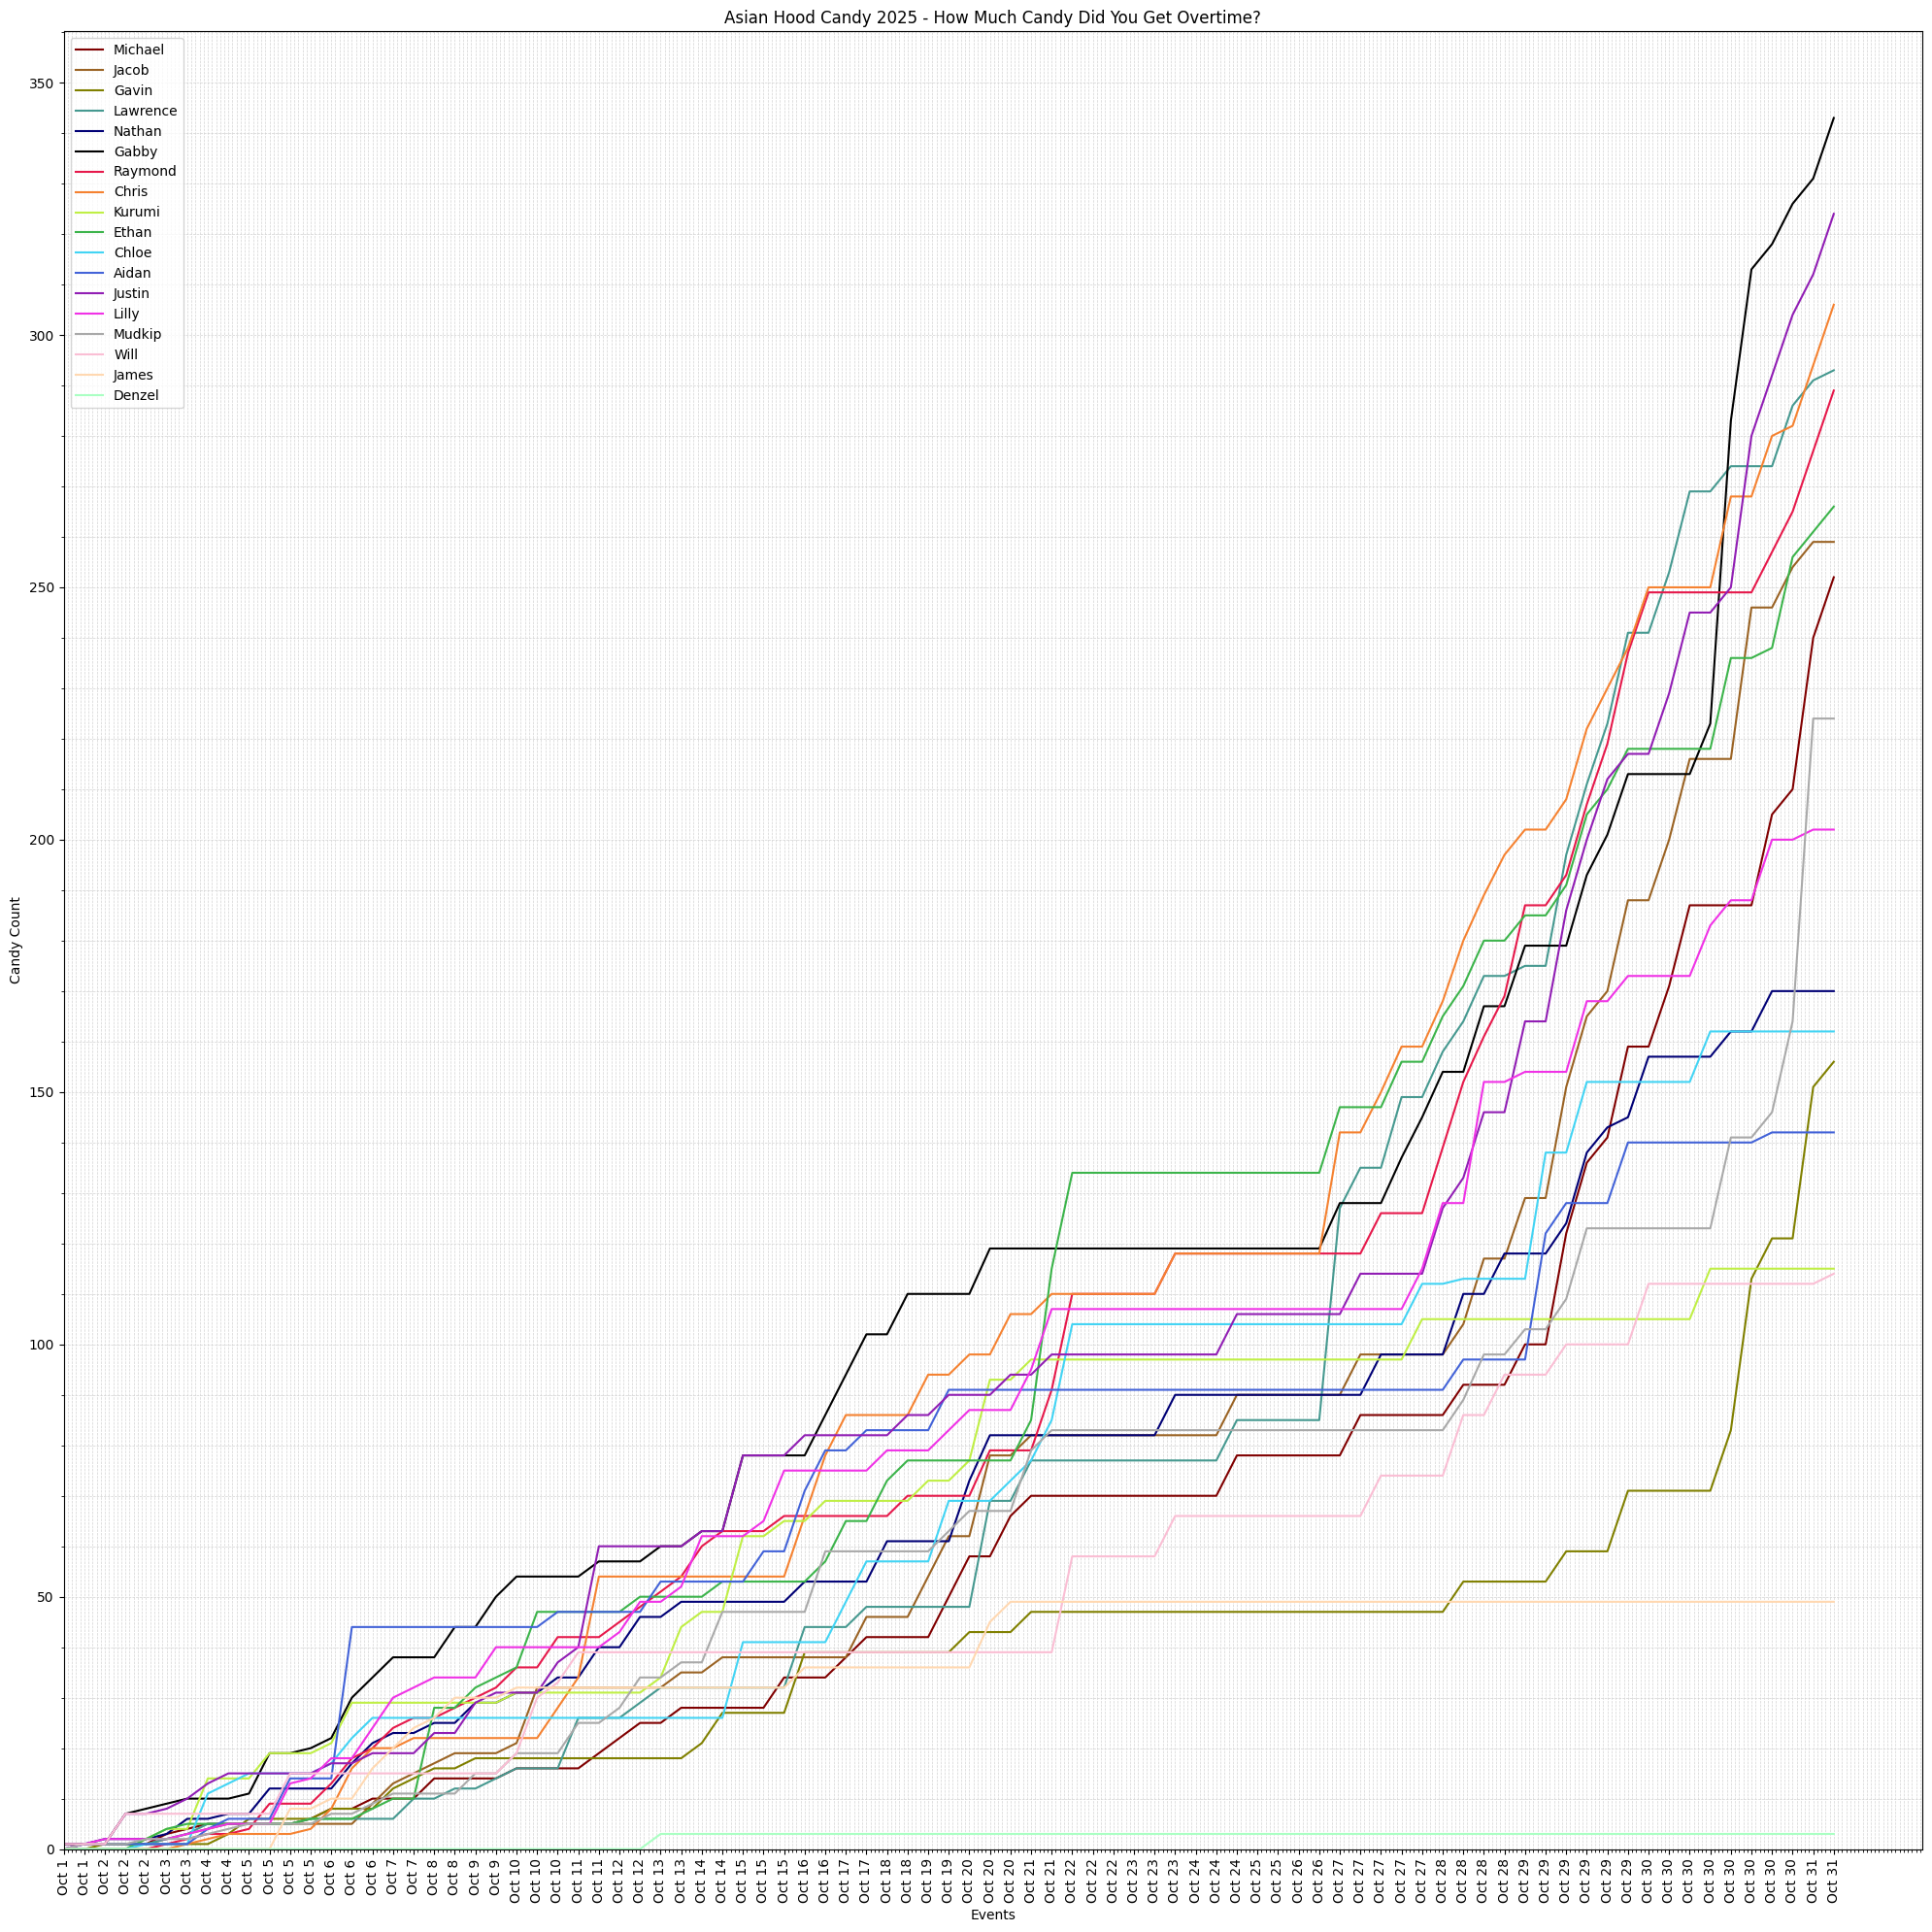

In [8]:
plt.figure(figsize=(20, 20))

for i, p in enumerate(players):
    plt.plot(df_lineplot.index, df_lineplot[p], label=p, color=colors[i])

plt.title('Asian Hood Candy 2025 - How Much Candy Did You Get Overtime?')
plt.xlabel('Events')
plt.ylabel('Candy Count')
plt.ylim(bottom = 0)
plt.xlim(left = 0)
plt.xticks(df_lineplot.index, df_lineplot['Day'], rotation=90)
plt.grid(True, which='both', axis='both', color='lightgray', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend()

plt.tight_layout()
plt.show()

# CANDY BAR PLOT

In [9]:
def z_score(num, prob_dist):
    expected = sum(val * prob for val, prob in prob_dist.items())
    var = sum(prob * (val - expected)**2 for val, prob in prob_dist.items())
    std_dev = np.sqrt(var)
    return (num - expected) / std_dev

In [10]:
def z_score_array(prob_arr, boostedprob_arr, boostedppl_arr, values_arr, name):
    vector = []
    for i in range(len(values_arr)):
        if np.isnan(values_arr[i]):
            continue
        if not pd.isna(boostedppl_arr[i]) and name in boostedppl_arr[i]:
            prob_dist = boostedprob_arr[i]
        else:
            prob_dist = prob_arr[i]
        z = z_score(values_arr[i], prob_dist)
        vector.append(z)
    return vector

In [11]:
df_barplot = df[['Probability', 'Boosted Probability', 'Boosted People', 'Type'] + players]
df_barplot = df_barplot[df_barplot['Type'] == True]
df_barplot = df_barplot.reset_index(drop=True)
df_barplot

,Probability,Boosted Probability,Boosted People,Type,Michael,Jacob,Gavin,Lawrence,Nathan,Gabby,...,Kurumi,Ethan,Chloe,Aidan,Justin,Lilly,Mudkip,Will,James,Denzel
0,"{0: 0.75, 1: 0.25}",NaN,NaN,True,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
1,"{0: 0.75, 1: 0.25}",NaN,NaN,True,0.0,0.0,NaN,0.0,1.0,0.0,...,NaN,0.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
2,"{0: 0.75, 1: 0.25}",NaN,NaN,True,0.0,0.0,1.0,NaN,1.0,0.0,...,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,NaN
3,"{0: 0.75, 6: 0.25}",NaN,NaN,True,0.0,0.0,0.0,NaN,0.0,6.0,...,NaN,0.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0,NaN
4,"{0: 0.5, 1: 0.35, 2: 0.1, 3: 0.04, 10: 0.01}",NaN,NaN,True,0.0,0.0,0.0,NaN,0.0,1.0,...,2.0,2.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,"{30: 0.25, 0: 0.75}",NaN,NaN,True,0.0,30.0,30.0,0.0,0.0,30.0,...,NaN,0.0,0.0,0.0,30.0,0.0,0.0,NaN,0.0,NaN
71,"{2: 0.2, 5: 0.2, 8: 0.2, 12: 0.2, 18: 0.14, 30...",NaN,NaN,True,18.0,NaN,8.0,NaN,8.0,5.0,...,NaN,2.0,NaN,2.0,12.0,12.0,5.0,NaN,NaN,NaN
72,"{2: 0.2, 5: 0.2, 8: 0.2, 12: 0.2, 18: 0.14, 30...",NaN,NaN,True,5.0,8.0,NaN,12.0,NaN,8.0,...,NaN,18.0,NaN,NaN,12.0,NaN,18.0,NaN,NaN,NaN
73,"{2: 0.2, 5: 0.2, 8: 0.2, 12: 0.2, 18: 0.14, 30...",NaN,NaN,True,30.0,5.0,30.0,5.0,NaN,5.0,...,NaN,5.0,NaN,NaN,8.0,2.0,60.0,NaN,NaN,NaN


In [12]:
z_score_dict = {}
for name in players:
    z_score_dict[name] = np.mean(z_score_array(df_barplot['Probability'], df_barplot['Boosted Probability'], df_barplot['Boosted People'], df_barplot[name], name))

for key, val in z_score_dict.items():
    print(key, val)


Michael -0.06744102053516694
Jacob 0.09286055114184293
Gavin -0.09613036555596619
Lawrence 1.0450956785502081
Nathan -0.06058049910368722
Gabby 0.540887555955792
Raymond 0.2338077124995434
Chris 0.5254200215133874
Kurumi 0.2244226649201252
Ethan 0.3778075697003199
Chloe 0.3603436479631436
Aidan 0.08121593889504902
Justin 0.5394704753427463
Lilly 0.7027031341589887
Mudkip 0.1597453393315319
Will 0.596425286914999
James -0.19710507386599188
Denzel 0.11175975124542262


In [13]:
# z_scores_agg = np.array(list(z_score_dict.values()))
# z_scores_agg_no_nan = z_scores_agg[~np.isnan(z_scores_agg)]

# x = np.linspace(-3, 3, 1000)
# y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# plt.figure(figsize=(20, 10))
# plt.plot(x, y, label="Z-score", color='black', lw=2)

# for i, (name, z_score) in enumerate(z_score_dict.items()):
#     plt.axvline(z_score, color=colors[i], linestyle='-', label=f'{name}: {z_score:.2f}')

# plt.xlim(z_scores_agg_no_nan.min() - 0.25, z_scores_agg_no_nan.max() + 0.25)
# plt.title('How Lucky Are You?')
# plt.xlabel('Z-Score')
# plt.ylabel('Density')
# plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5))

# plt.tight_layout()
# plt.show()

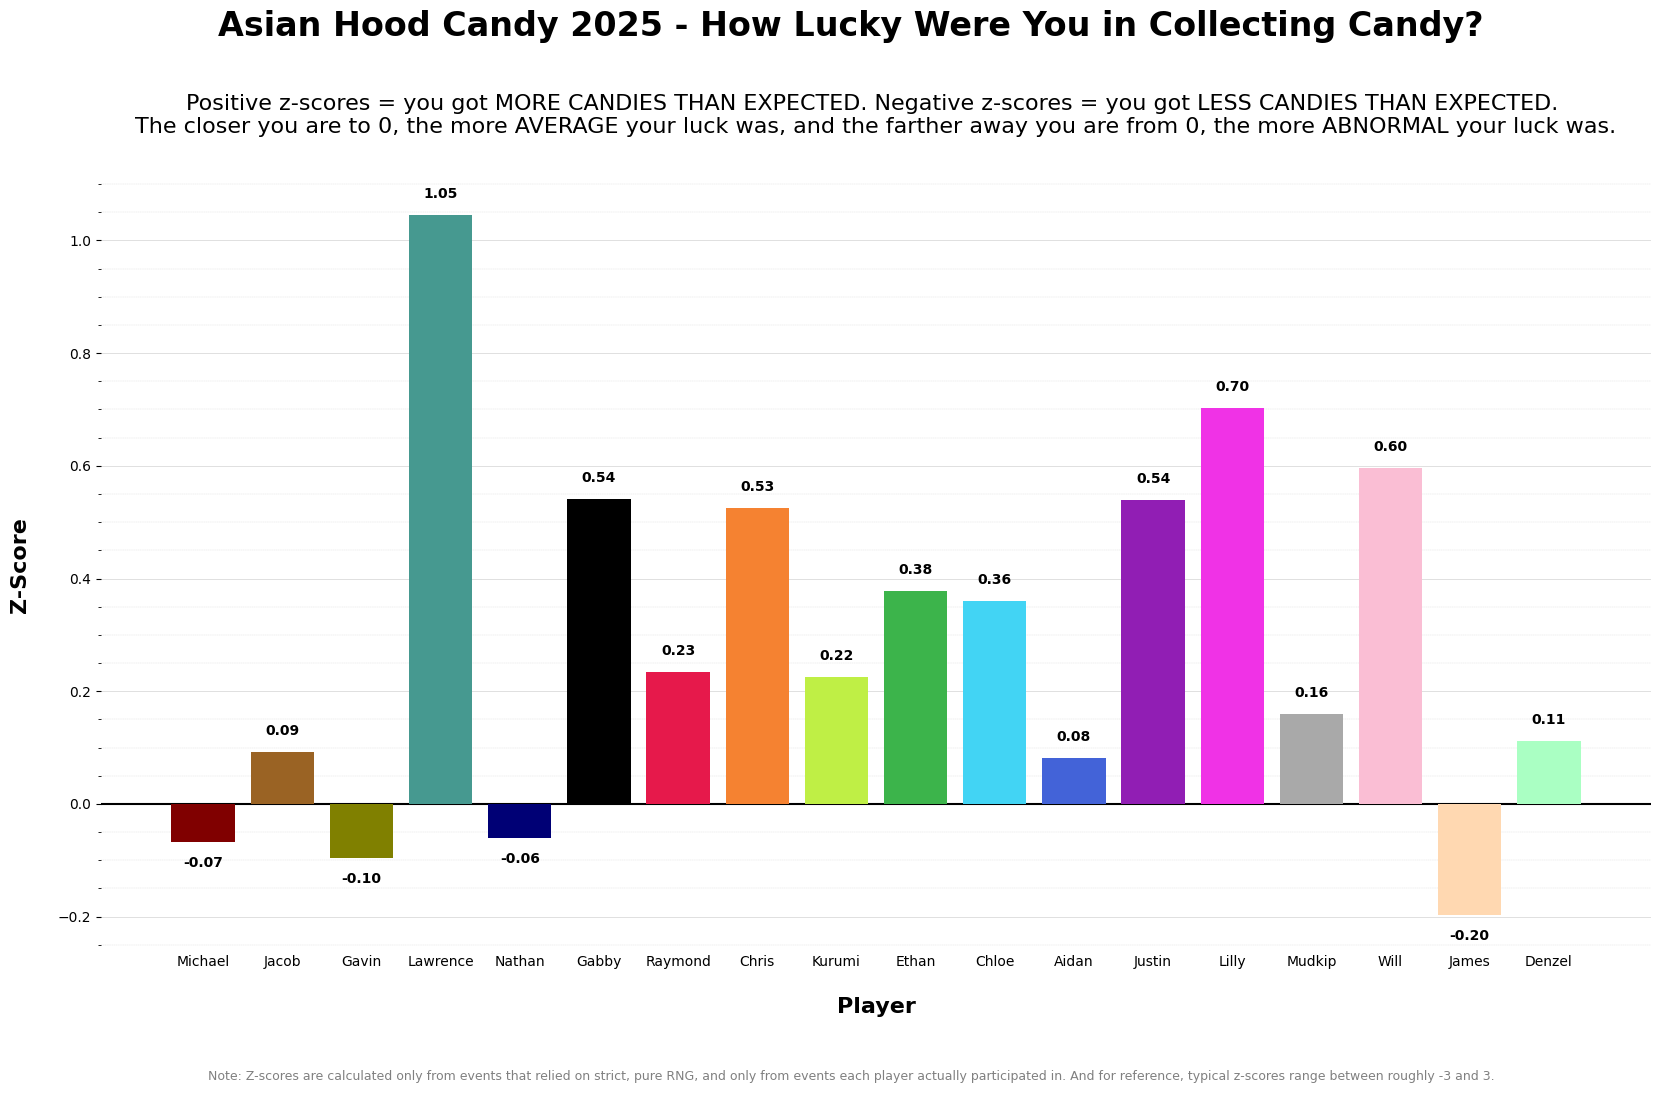

In [14]:
z_scores_agg = np.array(list(z_score_dict.values())) # raw values

plt.figure(figsize=(20, 10))
bars = plt.bar(players, z_scores_agg, color=colors, zorder=3)

for bar, val in zip(bars, z_scores_agg):
    if val > 0:
        y_pos = bar.get_height() + 0.025
        va = 'bottom'
    else:
        y_pos = bar.get_height() - 0.025
        va = 'top'
    
    plt.text(
        bar.get_x() + bar.get_width() / 2, # x pos
        y_pos, # y pos
        f"{val:.2f}",
        ha='center', va=va, fontsize=10, fontweight='bold'
    )

plt.suptitle("Asian Hood Candy 2025 - How Lucky Were You in Collecting Candy?", fontsize=24, fontweight='bold', y=1.05)
plt.title("Positive z-scores = you got MORE CANDIES THAN EXPECTED. Negative z-scores = you got LESS CANDIES THAN EXPECTED. \nThe closer you are to 0, the more AVERAGE your luck was, and the farther away you are from 0, the more ABNORMAL your luck was.", fontsize=16, y=1.05)
plt.xlabel("Player", fontsize=16, fontweight='bold',labelpad=20)
plt.ylabel("Z-Score", fontsize=16, fontweight='bold', labelpad=20)
plt.grid(True, which='major', axis='y', zorder=0, color='lightgray', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', axis='y', zorder=0, color='lightgray', linestyle='--', linewidth=0.25)
# plt.ylim(-3, 3)
plt.axhline(0, color='black', linewidth=1.5)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', which='both', length=0)

plt.figtext(
    0.5, -0.02, 
    "Note: Z-scores are calculated only from events that relied on strict, pure RNG, and only from events each player actually participated in. And for reference, typical z-scores range between roughly -3 and 3.",
    wrap=True, ha='center', fontsize=9, color='gray'
)

plt.tight_layout
plt.show()

# CANDY CHECKLIST BAR PLOT

In [15]:
file_path2 = Path.cwd() / "datasets" / "candy_checklist.csv"
df2 = pd.read_csv(file_path2)
df2.head(5)

,Index,Day,Time,Special Notes,Michael,Jacob,Gavin,Lawrence,Nathan,Gabby,...,Kurumi_Ban,Ethan_Ban,Chloe_Ban,Aidan_Ban,Justin_Ban,Lilly_Ban,Mudkip_Ban,Will_Ban,James_Ban,Denzel_Ban
0,0,Oct 23,0,NaN,"['Sour Patch Kids',\n'Dum Dum']","['Dum Dum',\n'Festive Pencil']",NaN,"['Dots',\n'100 Grand']","['Krabby Patty',\n'Dots']","['Dots',\n'Krabby Patty']",...,[],[],[],[],[],[],[],[],[],[]
1,1,Oct 23,20,NaN,"['100 Grand',\n'Crunch']","['Butter Finger',\n'Dum Dum']","['Dots',\n'Sour Patch Kids']","['Butterfinger',\n'Starburst']","['Starburst',\n'Crunch']","['100 Grand',\n'100 Grand']",...,[],[],[],[],[],[],[],[],[],[]
2,2,Oct 24,0,NaN,"['Dots',\n'Dum Dum']","['Krabby Patty',\n'Krabby Patty']","['Sour Patch Kids',\n'100 Grand']","['Butterfinger',\n'100 Grand']","['Crunch',\n'Fun Dip']","['Starburst',\n'Fun Dip']",...,[],[],[],[],['Starburst'],[],[],[],[],[]
3,3,Oct 24,20,NaN,"['Dots',\n'Starburst']","['Dots',\n'Dots']","['Dots',\n'Fun Dip']","['Dum Dum',\n'Dots']",NaN,"['Butterfinger',\n'Starburst']",...,[],['Starburst'],[],[],['Starburst'],['Festive Pencil'],[],[],[],[]
4,4,Oct 25,0,NaN,"['Krabby Patty',\n'Festive Pencil']","['Sour Patch Kids',\n'Butterfinger']","['Butterfinger',\n'100 Grand']","['Sour Patch Kids',\n'Crunch']","['Fun Dip',\n'Krabby Patty']","['Dum Dum',\n'Butterfinger']",...,[],['Starburst'],[],[],['Starburst'],['Festive Pencil'],[],[],[],[]


In [16]:
cols_to_clean = [col for col in df2.columns if col not in ['Index', 'Day', 'Time', 'Special Notes']]
df2[cols_to_clean] = df2[cols_to_clean].astype(object)

for col in cols_to_clean:
    # print(f"Cleaning {col}")
    for i in df2.index:
        cell = df2.at[i, col]
        if not pd.isna(cell):
            try:
                new_cell_val = ast.literal_eval(cell.replace("\n", "").strip())
            except Exception as e:
                # print(f"ERROR: {i}, {col}")
                new_cell_val = []
            # print(i, col)
            df2.at[i, col] = new_cell_val
        else:
            try:
                df2.at[i, col] = []
            except Exception as e:
                # print(f"ERROR: {i}, {col}")
                pass

df2.head(5)

,Index,Day,Time,Special Notes,Michael,Jacob,Gavin,Lawrence,Nathan,Gabby,...,Kurumi_Ban,Ethan_Ban,Chloe_Ban,Aidan_Ban,Justin_Ban,Lilly_Ban,Mudkip_Ban,Will_Ban,James_Ban,Denzel_Ban
0,0,Oct 23,0,NaN,"[Sour Patch Kids, Dum Dum]","[Dum Dum, Festive Pencil]",[],"[Dots, 100 Grand]","[Krabby Patty, Dots]","[Dots, Krabby Patty]",...,[],[],[],[],[],[],[],[],[],[]
1,1,Oct 23,20,NaN,"[100 Grand, Crunch]","[Butter Finger, Dum Dum]","[Dots, Sour Patch Kids]","[Butterfinger, Starburst]","[Starburst, Crunch]","[100 Grand, 100 Grand]",...,[],[],[],[],[],[],[],[],[],[]
2,2,Oct 24,0,NaN,"[Dots, Dum Dum]","[Krabby Patty, Krabby Patty]","[Sour Patch Kids, 100 Grand]","[Butterfinger, 100 Grand]","[Crunch, Fun Dip]","[Starburst, Fun Dip]",...,[],[],[],[],[Starburst],[],[],[],[],[]
3,3,Oct 24,20,NaN,"[Dots, Starburst]","[Dots, Dots]","[Dots, Fun Dip]","[Dum Dum, Dots]",[],"[Butterfinger, Starburst]",...,[],[Starburst],[],[],[Starburst],[Festive Pencil],[],[],[],[]
4,4,Oct 25,0,NaN,"[Krabby Patty, Festive Pencil]","[Sour Patch Kids, Butterfinger]","[Butterfinger, 100 Grand]","[Sour Patch Kids, Crunch]","[Fun Dip, Krabby Patty]","[Dum Dum, Butterfinger]",...,[],[Starburst],[],[],[Starburst],[Festive Pencil],[],[],[],[]


In [17]:
candy_checklist_dict = {}
for p in players:
    col = df2[p]
    total = 0
    for lootbox in col:
        if len(lootbox) > 0:
            if lootbox[0] == 'CUT':
                total += 0
                break
            elif lootbox[1] == 'CUT':
                total += 1
                break
            else:
                total += 2
    candy_checklist_dict[p] = total

candy_checklist_dict

{'Michael': 23,
 'Jacob': 23,
 'Gavin': 22,
 'Lawrence': 15,
 'Nathan': 23,
 'Gabby': 14,
 'Raymond': 19,
 'Chris': 16,
 'Kurumi': 0,
 'Ethan': 18,
 'Chloe': 22,
 'Aidan': 22,
 'Justin': 18,
 'Lilly': 19,
 'Mudkip': 21,
 'Will': 4,
 'James': 14,
 'Denzel': 0}

In [18]:
did_not_finish = ['Kurumi', 'Will', 'James', 'Denzel']
for dnf in did_not_finish:
    del candy_checklist_dict[dnf]
colors2 = ['#800000','#9A6324','#808000','#469990','#000075','#000000','#e6194B','#f58231',
         '#3cb44b','#42d4f4','#4363d8','#911eb4','#f032e6','#a9a9a9','#fabed4']

candy_checklist_dict

{'Michael': 23,
 'Jacob': 23,
 'Gavin': 22,
 'Lawrence': 15,
 'Nathan': 23,
 'Gabby': 14,
 'Raymond': 19,
 'Chris': 16,
 'Ethan': 18,
 'Chloe': 22,
 'Aidan': 22,
 'Justin': 18,
 'Lilly': 19,
 'Mudkip': 21}

In [19]:
def simulate_checklist_event(n=100):
    candies = {
        "Starburst": 0.5/5, "Festive Pencil": 0.5/5, "Dum Dum": 0.5/5, "Dots": 0.5/5, "Fun Dip": 0.5/5,
        "Butterfinger": 0.31/3, "100 Grand": 0.31/3, "Sour Patch Kids": 0.31/3,
        "Krabby Patty": 0.178/2, "Crunch": 0.178/2, "KitKat": 0.01, "Fent-Laced Ring Pop": 0.002
    }

    checklist = [
        'Starburst', 'Festive Pencil', 'Dum Dum', 'Dots', 'Fun Dip',
        'Butterfinger', '100 Grand', 'Sour Patch Kids',
        'Krabby Patty', 'Crunch'
    ]

    candy_names = list(candies.keys())
    prob_dist = list(candies.values())

    vector = np.zeros(n)

    for i in range(n):
        collection = {c:0 for c in candy_names}
        open_loot = 0

        while True:
            c = np.random.choice(candy_names, p=prob_dist)

            if c == "Fent-Laced Ring Pop":
                collection = {c:0 for c in candy_names}
                continue
            elif c == "KitKat":
                open_loot += 1
                break

            if collection[c] < 3:
                collection[c] += 1
                open_loot += 1
            else:
                continue

            if all(collection[x] >= 1 for x in checklist):
                break

        vector[i] = open_loot

    return np.mean(vector), np.std(vector)

expected_lootboxes, std_dev_lootboxes = simulate_checklist_event()
print(f"Expected draws: {expected_lootboxes:.2f}, Std: {std_dev_lootboxes:.2f}")
# 10,000 simulations show (20, 7)

Expected draws: 19.24, Std: 6.43


In [20]:
z_score_dict2 = {}
expected_lootboxes_10000 = 20
std_dev_lootbozes_10000 = 7
for name, lootboxes in candy_checklist_dict.items():
    z_score_dict2[name] = -1 * ((lootboxes - expected_lootboxes_10000) / std_dev_lootbozes_10000)
z_score_dict2

{'Michael': -0.42857142857142855,
 'Jacob': -0.42857142857142855,
 'Gavin': -0.2857142857142857,
 'Lawrence': 0.7142857142857143,
 'Nathan': -0.42857142857142855,
 'Gabby': 0.8571428571428571,
 'Raymond': 0.14285714285714285,
 'Chris': 0.5714285714285714,
 'Ethan': 0.2857142857142857,
 'Chloe': -0.2857142857142857,
 'Aidan': -0.2857142857142857,
 'Justin': 0.2857142857142857,
 'Lilly': 0.14285714285714285,
 'Mudkip': -0.14285714285714285}

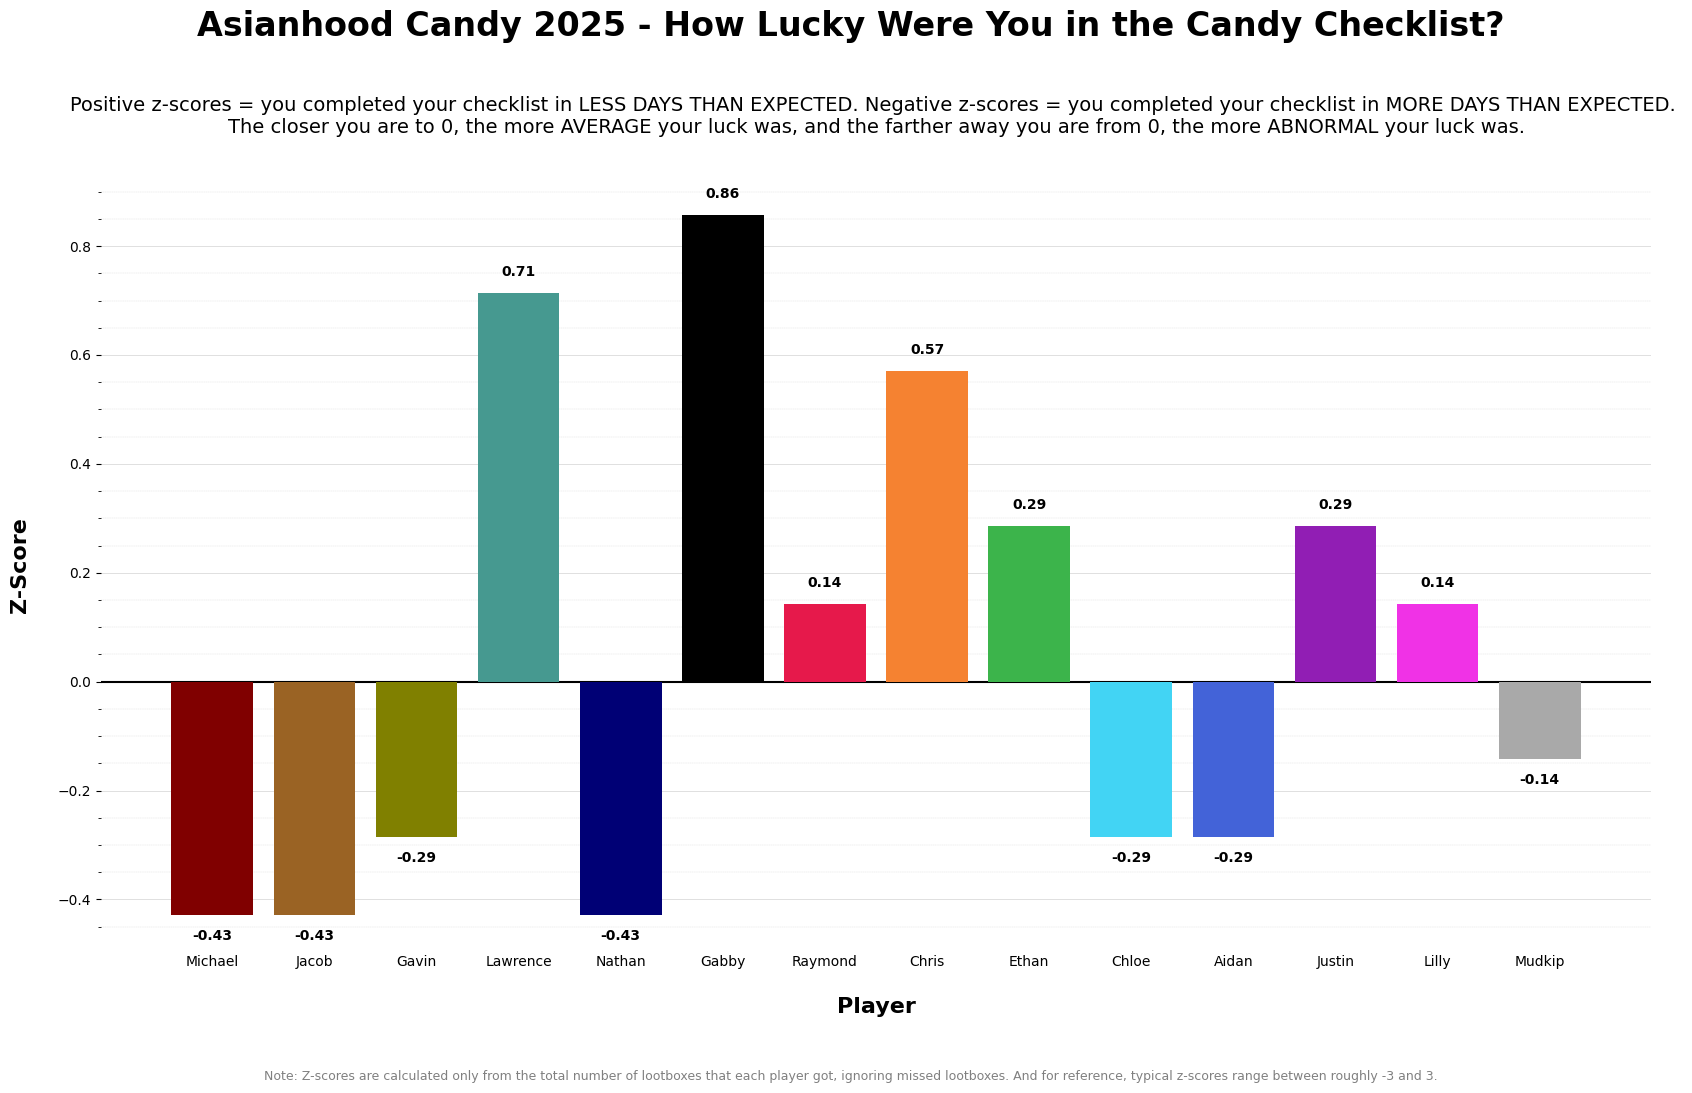

In [21]:
z_scores_agg2 = np.array(list(z_score_dict2.values())) # raw values

plt.figure(figsize=(20, 10))
bars = plt.bar(candy_checklist_dict.keys(), z_scores_agg2, color=colors2, zorder=3)

for bar, val in zip(bars, z_scores_agg2):
    if val > 0:
        y_pos = bar.get_height() + 0.025
        va = 'bottom'
    else:
        y_pos = bar.get_height() - 0.025
        va = 'top'
    
    plt.text(
        bar.get_x() + bar.get_width() / 2, # x pos
        y_pos, # y pos
        f"{val:.2f}",
        ha='center', va=va, fontsize=10, fontweight='bold'
    )

plt.suptitle("Asianhood Candy 2025 - How Lucky Were You in the Candy Checklist?", fontsize=24, fontweight='bold', y=1.05)
plt.title("Positive z-scores = you completed your checklist in LESS DAYS THAN EXPECTED. Negative z-scores = you completed your checklist in MORE DAYS THAN EXPECTED. \nThe closer you are to 0, the more AVERAGE your luck was, and the farther away you are from 0, the more ABNORMAL your luck was.", fontsize=14, y=1.05)
plt.xlabel("Player", fontsize=16, fontweight='bold', labelpad=20)
plt.ylabel("Z-Score", fontsize=16, fontweight='bold', labelpad=20)
plt.grid(True, which='major', axis='y', zorder=0, color='lightgray', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', axis='y', zorder=0, color='lightgray', linestyle='--', linewidth=0.25)
# plt.ylim(-3, 3)
plt.axhline(0, color='black', linewidth=1.5)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', which='both', length=0)

plt.figtext(
    0.5, -0.02, 
    "Note: Z-scores are calculated only from the total number of lootboxes that each player got, ignoring missed lootboxes. And for reference, typical z-scores range between roughly -3 and 3.",
    wrap=True, ha='center', fontsize=9, color='gray'
)

plt.tight_layout
plt.show()